<a href="https://colab.research.google.com/github/pszysz/Daily_registrations/blob/master/Daily_regs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

from sklearn.metrics import mean_absolute_error as mae
%matplotlib inline

In [0]:
register_matplotlib_converters()

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/pszysz/Daily_registrations/master/rej_dzienne.csv', sep=';', parse_dates=['ds'], index_col='ds')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2015-01-01 to 2019-09-30
Data columns (total 1 columns):
y    1734 non-null int64
dtypes: int64(1)
memory usage: 27.1 KB


In [0]:
data['y'] = data['y'].astype('float')

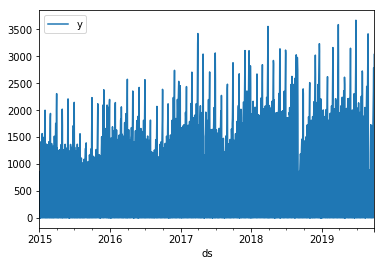

In [15]:
data.plot();

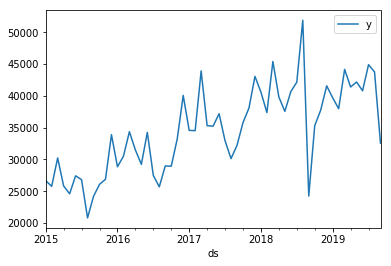

In [16]:
data.resample('1M').sum().plot();

In [0]:
data = data.reset_index()

In [18]:
data.head()

,ds,y
0,2015-01-01,0.0
1,2015-01-02,859.0
2,2015-01-03,1.0
3,2015-01-04,0.0
4,2015-01-05,828.0


In [19]:
data[data['ds'] >= '2019-1-1'].count()

ds    273
y     273
dtype: int64

In [0]:
num_periods = 273

train = data[:-num_periods]
test = data[-num_periods:]

In [21]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = model.make_future_dataframe(periods=num_periods, freq='D', include_history=False)
future.tail()

,ds
268,2019-09-26
269,2019-09-27
270,2019-09-28
271,2019-09-29
272,2019-09-30


In [0]:
forecast = model.predict(future)

In [0]:
def plot_forecast(test, forecast):
    forecast = forecast[-num_periods:]
    score = np.round(mae(test.y, forecast.yhat), 2)
    plt.figure(figsize=(15,5))
    plt.title('Forecast {} days new cars registrations. \nmae={}\nProphet'.format(len(test), score))
    plt.plot(test.ds, test.y, label='actual')
    plt.plot(test.ds, forecast.yhat, label='forecast')
    plt.legend();
    print('Test data total = '+ str(round(test['y'].sum(), 0)))
    print('Forecast data total = ' + str(round(forecast['yhat'].sum())))
    print('Difference is {}%'.format(round(100*(forecast['yhat'].sum() - test['y'].sum()) / test['y'].sum(), 1)))

Test data total = 367412.0
Forecast data total = 386131.0
Difference is 5.1%


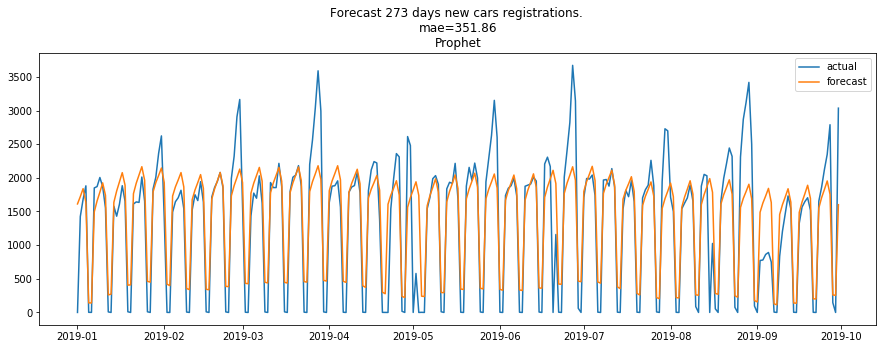

In [25]:
plot_forecast(test, forecast)

In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1371.125283,1080.242498,2114.722226,1371.125283,1371.125283,241.066274,241.066274,241.066274,391.387481,391.387481,391.387481,-150.321207,-150.321207,-150.321207,0.0,0.0,0.0,1612.191557
1,2019-01-02,1371.462350,1175.562853,2280.950751,1371.462350,1371.462350,349.243946,349.243946,349.243946,503.786327,503.786327,503.786327,-154.542381,-154.542381,-154.542381,0.0,0.0,0.0,1720.706297
2,2019-01-03,1371.799418,1270.537174,2325.735250,1371.799418,1371.799418,467.241452,467.241452,467.241452,622.327552,622.327552,622.327552,-155.086099,-155.086099,-155.086099,0.0,0.0,0.0,1839.040870
3,2019-01-04,1372.136486,1110.427040,2182.212874,1372.136486,1372.136486,265.360636,265.360636,265.360636,417.409422,417.409422,417.409422,-152.048786,-152.048786,-152.048786,0.0,0.0,0.0,1637.497122
4,2019-01-05,1372.473553,-406.477778,662.412963,1372.473553,1372.473553,-1230.434018,-1230.434018,-1230.434018,-1084.842229,-1084.842229,-1084.842229,-145.591789,-145.591789,-145.591789,0.0,0.0,0.0,142.039535


In [27]:
print(round(forecast['yhat'].sum(),0))
print(test.sum())

386131.0
y    367412.0
dtype: float64


In [0]:
test_1m = test[test['ds'] < '2019-2-1']
forecast_1m = forecast[forecast['ds'] < '2019-2-1']

Test data total = 39697.0
Forecast data total = 45057.0
Difference is 13.5%


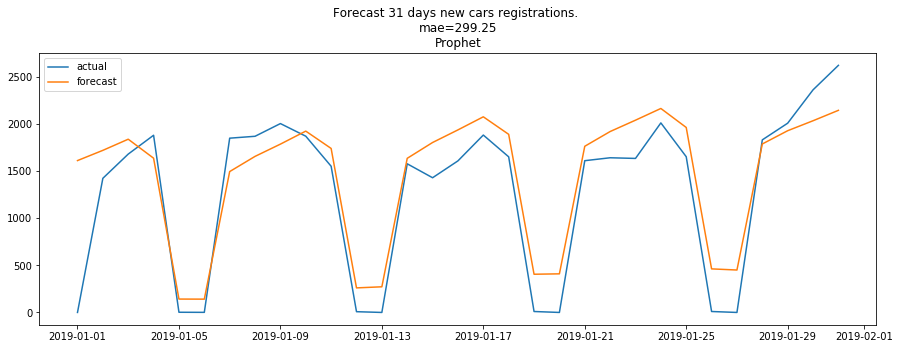

In [29]:
plot_forecast(test_1m, forecast_1m)

Test data total = 121832.0
Forecast data total = 131868.0
Difference is 8.2%


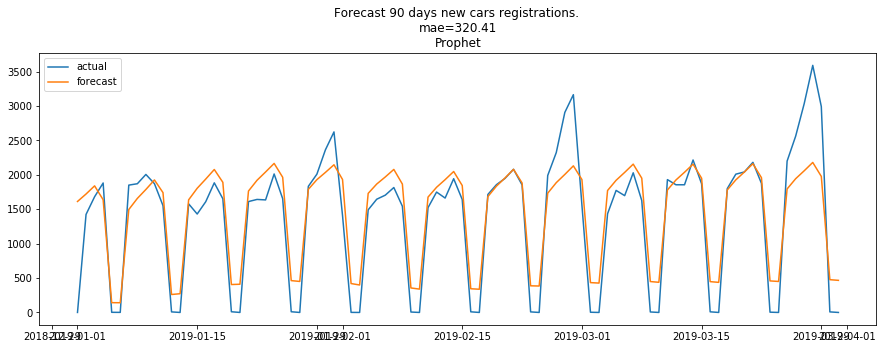

In [30]:
test_3m = test[test['ds'] < '2019-4-1']
forecast_3m = forecast[forecast['ds'] < '2019-4-1']
plot_forecast(test_3m, forecast_3m)

In [31]:
model_2 = Prophet()
model_2.fit(data)
future_2 = model_2.make_future_dataframe(periods=92, freq='D', include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future_2.tail()

,ds
87,2019-12-27
88,2019-12-28
89,2019-12-29
90,2019-12-30
91,2019-12-31


In [0]:
forecast_2 = model_2.predict(future_2)

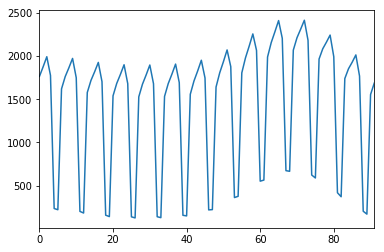

In [39]:
forecast_2['yhat'].plot(x=forecast_2['ds']);

In [43]:
forecast_2['month'] = forecast_2.ds.dt.month
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,month
0,2019-10-01,1405.565058,1220.697076,2282.233955,1405.565058,1405.565058,359.236854,359.236854,359.236854,414.429956,414.429956,414.429956,-55.193102,-55.193102,-55.193102,0.0,0.0,0.0,1764.801911,10
1,2019-10-02,1405.816784,1356.463378,2449.009681,1405.816784,1405.816784,470.170407,470.170407,470.170407,521.532256,521.532256,521.532256,-51.361849,-51.361849,-51.361849,0.0,0.0,0.0,1875.987192,10
2,2019-10-03,1406.068511,1445.085467,2514.075215,1406.068511,1406.068511,586.810639,586.810639,586.810639,635.948439,635.948439,635.948439,-49.137800,-49.137800,-49.137800,0.0,0.0,0.0,1992.879149,10
3,2019-10-04,1406.320237,1219.783477,2373.583022,1406.320237,1406.320237,370.035474,370.035474,370.035474,418.504272,418.504272,418.504272,-48.468798,-48.468798,-48.468798,0.0,0.0,0.0,1776.355712,10
4,2019-10-05,1406.571964,-305.315733,784.452804,1406.571964,1406.571964,-1172.416879,-1172.416879,-1172.416879,-1123.145760,-1123.145760,-1123.145760,-49.271119,-49.271119,-49.271119,0.0,0.0,0.0,234.155084,10


In [49]:
print('New passenger cars registrations forecast for last quarter of 2019, split by months:')
round(forecast_2.groupby('month')['yhat'].sum(), 0)

New passenger cars registrations forecast for last quarter of 2019, split by months:


month
10    41995.0
11    40935.0
12    49505.0
Name: yhat, dtype: float64